# Title 
## 3. Analysis


### Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


Importing the files created in Part 2, Data import and cleaning

In [2]:
hatemaps = pd.read_csv('/Users/gemma/Documents/data science/fc-hatemaps.csv')
crimes_by_state = pd.read_csv('/Users/gemma/Documents/data science/fc-crimes_by_state.csv')
state_totals = pd.read_csv('/Users/gemma/Documents/data science/fc-hate-state_totals.csv')
by_city_only = pd.read_csv('/Users/gemma/Documents/data science/fc-hate-by_city.csv')

Getting some counts as new columns

In [3]:
# making a table with counts to merge into the hatemaps

groups_per_type_per_state = hatemaps.groupby(['Year','State','Hate Type'])['Group Name'].nunique()
groups_per_type_per_state = groups_per_type_per_state.reset_index()


In [4]:
# reorganizing the data to make the merge more effective
groups_per_type_per_state = pd.pivot_table(groups_per_type_per_state, index=['Year','State'], values='Group Name', columns='Hate Type')

groups_per_type_per_state = groups_per_type_per_state.fillna(0)
groups_per_type_per_state = groups_per_type_per_state.reset_index()


In [5]:
# another table with counts

types_per_state = hatemaps.groupby(['Year','State'])['Hate Type'].nunique()
types_per_state = types_per_state.reset_index()

In [6]:

# merge the count of different types of hate groups with the state year info
state_totals = pd.merge(state_totals, types_per_state, on=['Year','State'])

# simplify some column names
state_totals.rename(columns={'Hate Type': 'Hate Type Count', 
                             'Race / Ethnicity / Ancestry': 'REA'}, inplace=True)


In [7]:
# merge this again with the count of groups per hate type
state_totals = pd.merge(state_totals, groups_per_type_per_state, on=['Year', 'State'])


In [8]:
state_totals.head()

,Unnamed: 0,Year,State,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,Hate Type Count,...,Christian Identity,General/Other,Holocaust Denial,Ku Klux Klan,Neo-Confederate,Neo-Nazi,Racist / Hate Music,Racist Skinhead,Radical Traditional Catholicism,White Nationalist
0,0,2006,AL,1.0,0.0,0.0,NaN,NaN,0.0,5,...,0.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0,0.0,3.0
1,3,2006,AK,4.0,0.0,0.0,NaN,NaN,2.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6,2006,AZ,90.0,30.0,1.0,NaN,NaN,28.0,6,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0
3,34,2006,AR,97.0,3.0,2.0,NaN,NaN,11.0,7,...,4.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0
4,81,2006,CA,844.0,204.0,3.0,NaN,NaN,246.0,12,...,0.0,3.0,2.0,4.0,1.0,8.0,3.0,13.0,2.0,1.0


In [9]:
# and again with the crimes committed in each crime type by state and year

state_totals = pd.merge(state_totals, 
                        crimes_by_state[crimes_by_state['State_name'] != 'Total'], 
                        on=['Year','State'])

## Total Number of Hate Groups (in all states) by year

In [10]:
overall_year = hatemaps.groupby('Year')['Group Name'].count() 

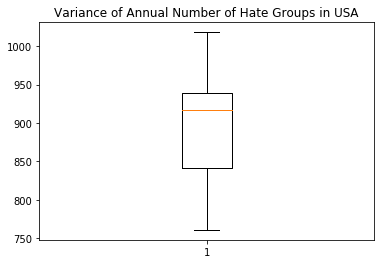

In [11]:
plt.boxplot(overall_year)
plt.title("Variance of Annual Number of Hate Groups in USA")
plt.show()

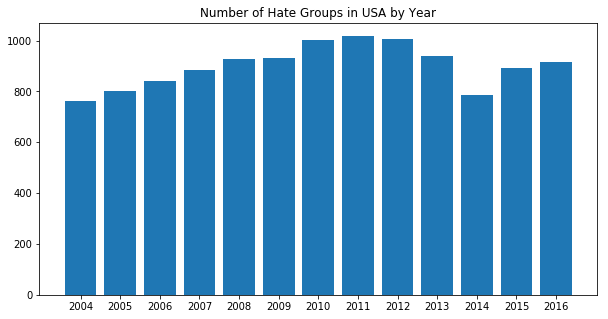

In [12]:
overall_year = overall_year.reset_index()

plt.figure(figsize=(10,5))
plt.bar(x=overall_year.iloc[:,0], height=overall_year.iloc[:,1])
plt.xticks(overall_year.iloc[:,0])
plt.title('Number of Hate Groups in USA by Year')
plt.show()

(array([2., 1., 0., 1., 1., 1., 4., 0., 0., 3.]),
 array([ 761. ,  786.7,  812.4,  838.1,  863.8,  889.5,  915.2,  940.9,
         966.6,  992.3, 1018. ]),
 <a list of 10 Patch objects>)

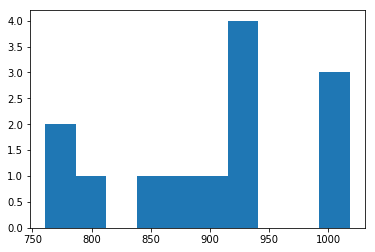

In [13]:
plt.hist(overall_year.iloc[:,1])


(look into that more, get some statisticis - mean, std dev, statistically different variances???) 

## States by number of hate groups (over the years)

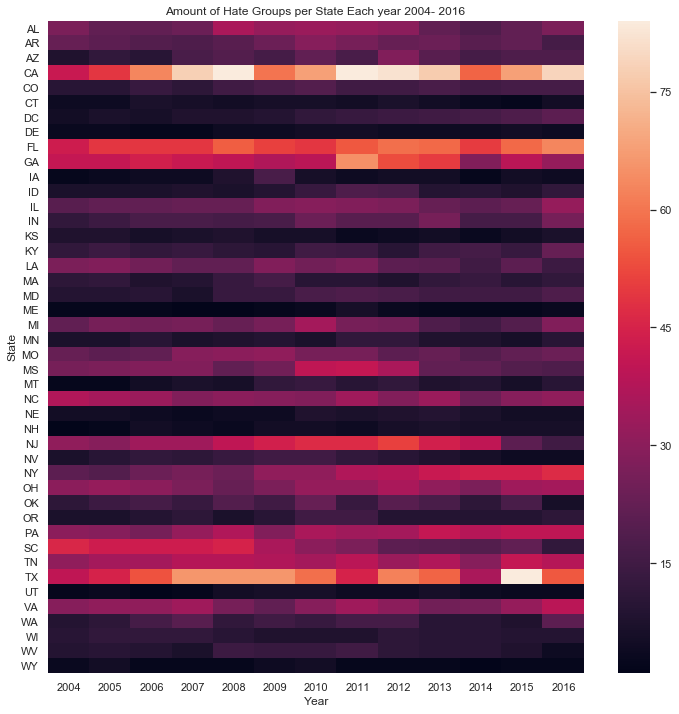

In [14]:
sns.set()                      

count_by_state = hatemaps.groupby(['State', 'Year'])['Group Name'].count().unstack().dropna()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(count_by_state,
            linewidths=0, ax=ax)
plt.title('Amount of Hate Groups per State Each year 2004- 2016 ')
plt.show()


The heatmap above is a little bit hard to read but at a glance, shows the general amount of hate groups in each state is low, and shows a couple of outliers such as Texas, especially in 2015, GA, FL and CA in general. Let's take a look at the boxplot of each state to get another look. 

(get some statitics here too) 

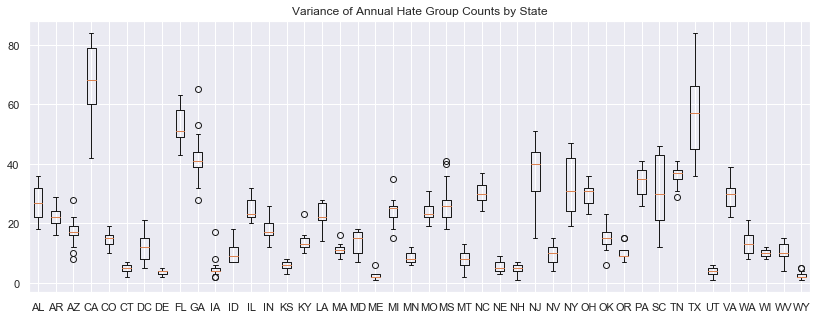

In [15]:
plt.figure(figsize=(14,5))
plt.boxplot(count_by_state, labels=count_by_state.index.values)
plt.title("Variance of Annual Hate Group Counts by State")
plt.show()

With this look, it is easier to see the outliers and how different they are from the other states - namely, CA, FL, GA, and TX. It is also interesting to see what each state's average and standard deviation is. CA seems to have a higher amount on average and a wide range, while TX, for example, has a wider ranger and a lower number on average.

## Number and size of of different hate (group) types

The hate groups are divided up into the following hate types.

In [16]:
list(set(hatemaps['Hate Type']))

['Black Nationalist',
 'Neo-Nazi',
 'General/Other',
 'Radical Traditional Catholicism',
 'Christian Identity',
 'Anti-LGBT',
 'White Nationalist',
 'Holocaust Denial',
 'Racist Skinhead',
 'Anti-Immigrant',
 'Neo-Confederate',
 'Ku Klux Klan',
 'Racist / Hate Music',
 'Anti-Muslim']

Let's look at how many distinct hate groups make a part of each hate type below. I'm going to split this into two separate charts to make it a little easier to look at. I'll split the groups up at the median of the means of each hate type size.

In [17]:
# size of hate types by number of groups in each

group_year = hatemaps.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()

larger_half = []
smaller_half = []

for col in group_year.columns.values:
    # if the mean size of this hate type is greater than the median mean size of all the types..
    if np.mean(group_year[col]) >= np.median(np.mean(group_year)):
        larger_half.append(col)
    else:
        smaller_half.append(col)
        
# making smaller dataframes
larger_ht = hatemaps.loc[hatemaps['Hate Type'].isin(larger_half)]
smaller_ht = hatemaps.loc[hatemaps['Hate Type'].isin(smaller_half)]

In [18]:
# grouping them to get the count of Groups per Hate Type in each dataframe
larger_grouped = larger_ht.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()
smaller_grouped = smaller_ht.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()

# pushing the index over so "year" becomes a column
larger_grouped = larger_grouped.reset_index()
smaller_grouped = smaller_grouped.reset_index()

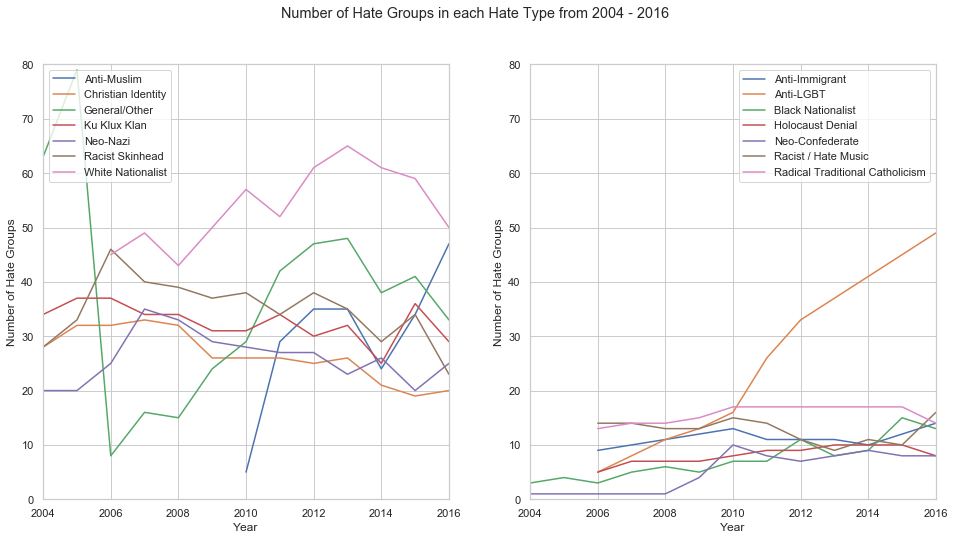

In [19]:
# plotting on 2 separate line plots to see the data more clearly

sns.set(style="whitegrid")

plt.figure(figsize=(16,8))
plt.suptitle('Number of Hate Groups in each Hate Type from 2004 - 2016')

plt.subplot(1,2,1)
ax = plt.gca()

for col in larger_half:
    larger_grouped.plot(kind='line',x='Year',y=col,ax=ax)
plt.ylim(0,80)
plt.xlim(2004,2016)
ax.set(ylabel='Number of Hate Groups', xlabel="Year")

plt.subplot(1,2,2)
ax = plt.gca()
for col in smaller_half:
    smaller_grouped.plot(kind='line',x='Year',y=col,ax=ax)
plt.ylim(0,80)
plt.xlim(2004,2016)
ax.set(ylabel='Number of Hate Groups', xlabel="Year")


plt.show()

Because these charts are easy to read with one standardized y axis, I plotted them that way to simplify comparison. It appears that the number of White Nationalist groups was higher than the majority of the the other groups, and generally increased from 2004 until 2013, at which point the number of groups started to drop. 

There is also an interesting outlier in General / Other, with a large number in year 2005, and then a large drop. This could be due to reclassifying the groups, perhaps, so we'll take that with a grain of salt.

Also of note is that some groups either only existed, or were counted, from year 2006. Finally, while most Hate Types do not have a steady increase, there are 2 exceptions to this - Anti-Muslim (had one drop in 2014, but other than that, steady incline) and Anti-LGBT.

##  Number of states with each hate type's presence

Let's take a quick general look at the number of states that have a presence of each hate type, organized by year, so we can see the growth / decline of each over time.

First let's look at the mean each year.

In [20]:
state_type = hatemaps.groupby(['Year',
                  'Hate Type'])['State'].nunique().dropna()
state_type = state_type.reset_index()


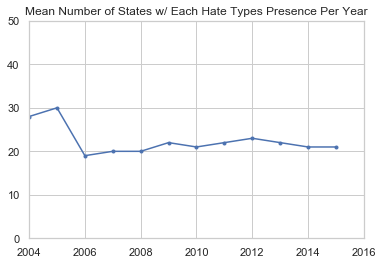

In [21]:
# get the line of the average for each year

mean_x = []
mean_y = []

mean_line = []
for i, year in enumerate(range(min(state_type['Year']), max(state_type['Year']))):
    mean_line.append((i+2004, int(np.mean(state_type[state_type['Year'] == year]['State']))))
    mean_x.append(i+2004)
    mean_y.append(int(np.mean(state_type[state_type['Year'] == year]['State'])))
    
plt.plot(mean_x, mean_y, marker='.')
plt.title('Mean Number of States w/ Each Hate Types Presence Per Year')
plt.ylim([0,50])
plt.xlim(min(state_type['Year']), max(state_type['Year']))
plt.show()


Next let's look at the variance of each group's size.

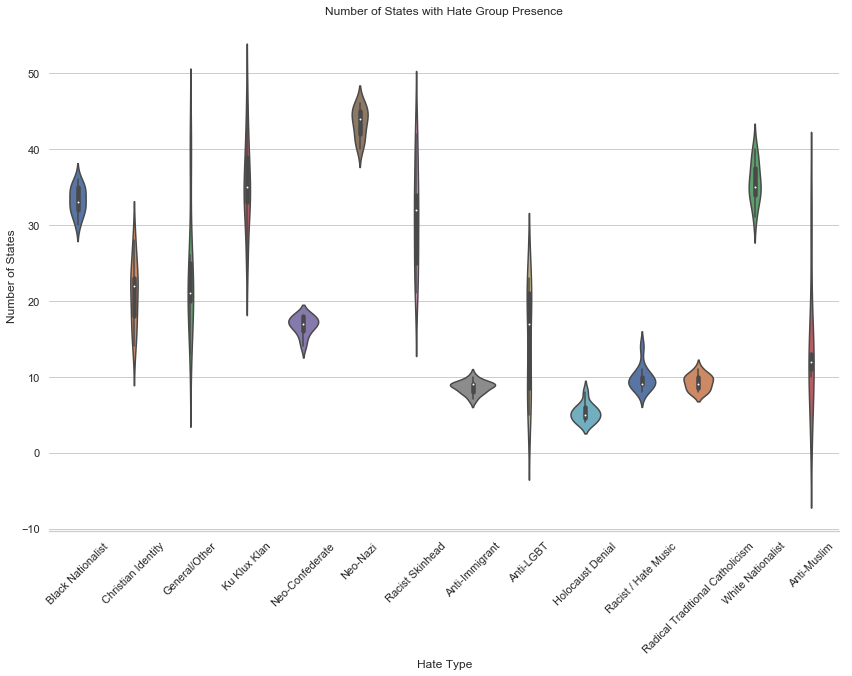

In [22]:
sns.set(style="whitegrid")

g = sns.catplot(x="Hate Type", y="State", data=state_type, aspect=1.5,
                   height=8, kind="violin", palette="deep",ci=95, dodge=True)
g.despine(left=True)
g.set_ylabels("Number of States")
g.set_xticklabels(rotation=45)
plt.title('Number of States with Hate Group Presence')
plt.show()

The graph above just shows the variance / distribution of the number of states of each hate group over the time period, without clearly showing the growth or decline linearly, which we'll look at below. However, it does show the types with the largest consistent number of states and the ones with the greatest and least variance, or the hate types that have had the greatest changes.

It looks like the following groups had the greatest growth/decline: General/Other, Racist Skinhead, Anti LGBT, and Anti-Muslim.

The groups that appear to have maintained the largest number of states consistently are Neo Nazi, and White Nationalist, followed by Black Nationalist.

At a glance they look to be quite different. Let's see if the difference is statistically significant. We'll use the Tukey range test because the variances aren't normally distributed and there are multiple pairwise comparisons.



In [23]:
compare_htypes = state_type.pivot_table(columns="Hate Type", index="Year",values="State")

In [24]:
types = compare_htypes.columns.values.tolist()

In [25]:
goodluck = []

for col in types:
    ok = compare_htypes[col].fillna(0).tolist()
    for val in ok:
        goodluck.append(val)

heights=np.asarray(goodluck)

materials = np.array(types)
materials = np.repeat(materials, 13)

tukey = pairwise_tukeyhsd(endog=heights,      # Data
                          groups=materials,   # Groups
                          alpha=0.05)         # Significance level

#tukey.summary() 

# Since there are so many comparisons here, I'm just going to show the ones where the null 
# hypothesis should be rejected (reject = True)
df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])


In [26]:
df[df['reject'] == True]

,group1,group2,meandiff,lower,upper,reject
2,Anti-Immigrant,Black Nationalist,25.9231,17.4989,34.3473,True
3,Anti-Immigrant,Christian Identity,13.6923,5.2681,22.1165,True
4,Anti-Immigrant,General/Other,16.2308,7.8066,24.6550,True
6,Anti-Immigrant,Ku Klux Klan,28.0000,19.5758,36.4242,True
7,Anti-Immigrant,Neo-Confederate,9.4615,1.0373,17.8858,True
8,Anti-Immigrant,Neo-Nazi,36.1538,27.7296,44.5781,True
10,Anti-Immigrant,Racist Skinhead,23.8462,15.4219,32.2704,True
12,Anti-Immigrant,White Nationalist,22.8462,14.4219,31.2704,True
14,Anti-LGBT,Black Nationalist,20.6154,12.1912,29.0396,True
16,Anti-LGBT,General/Other,10.9231,2.4989,19.3473,True


Next, let's look at the size changes of each group over time.

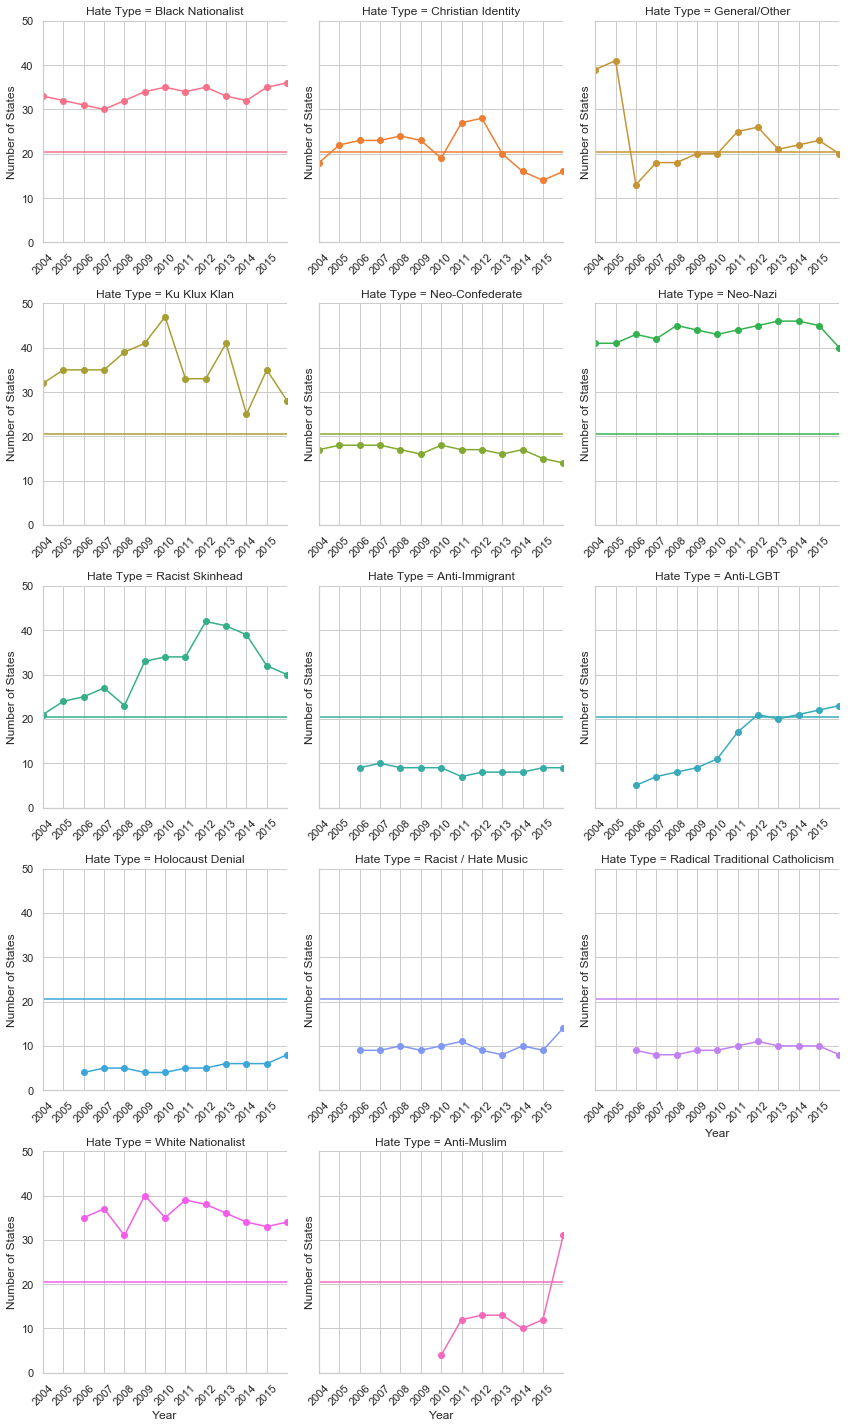

In [27]:
sns.set(style="whitegrid")

g = sns.FacetGrid(state_type, col='Hate Type', col_wrap=3, height=4,
                 ylim=(0,50), xlim=(min(state_type['Year']),max(state_type['Year'])),  palette="husl", hue="Hate Type")

#g.map(plt.plot, mean_x, mean_y, marker='.')
g.map(plt.axhline, y=np.median(state_type['State']))

g = g.map(plt.plot,'Year','State',marker="o") 

g.set(xticks=np.arange(min(state_type['Year']),max(state_type['Year'])), ylabel="Number of States")

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

g.fig.tight_layout(w_pad=1)

plt.show()

Each chart above shows the number of states with a presence of each hate type in each year, and it has the average overall number of states for each group marked as a line to help make comparison easier.



Below, we'll more directly compare the sizes of each hate group to each other.

Because of the large number of hate types, and the amount of states varying widely across those hate types, I split this into 3 separate charts that each have unique y axis ranges. It is a good idea to keep that in mind when comparing the information. 

In [28]:

# splitting up the data again so the charts are easier to read

one = ['White Nationalist','Ku Klux Klan',   'Neo-Nazi',     
        'Christian Identity', 'Black Nationalist',]

two = ['Anti-Muslim', 'Anti-LGBT',  'Neo-Confederate',
       'General/Other','Racist Skinhead', ]

three = ['Anti-Immigrant', 'Holocaust Denial',
         'Racist / Hate Music', 'Radical Traditional Catholicism']


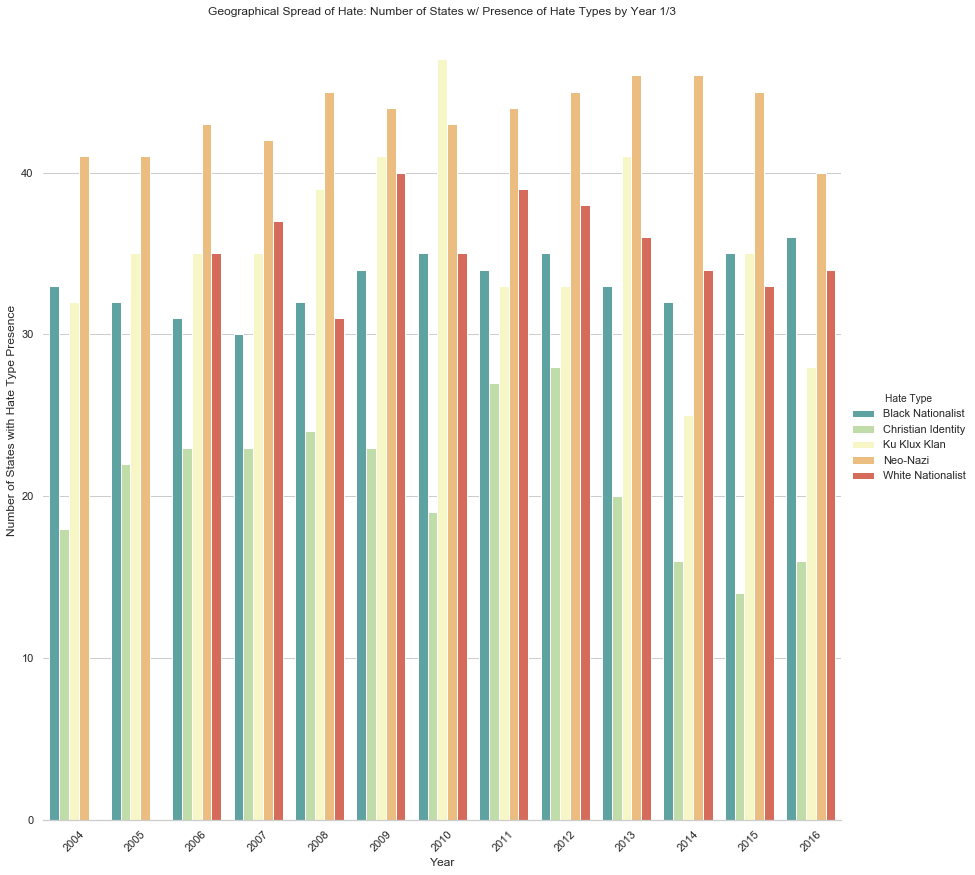

In [29]:
# chart 1
sns.set(style="whitegrid")

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(one)],
               height=12, kind="bar", palette="Spectral_r", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 1/3')
plt.show()

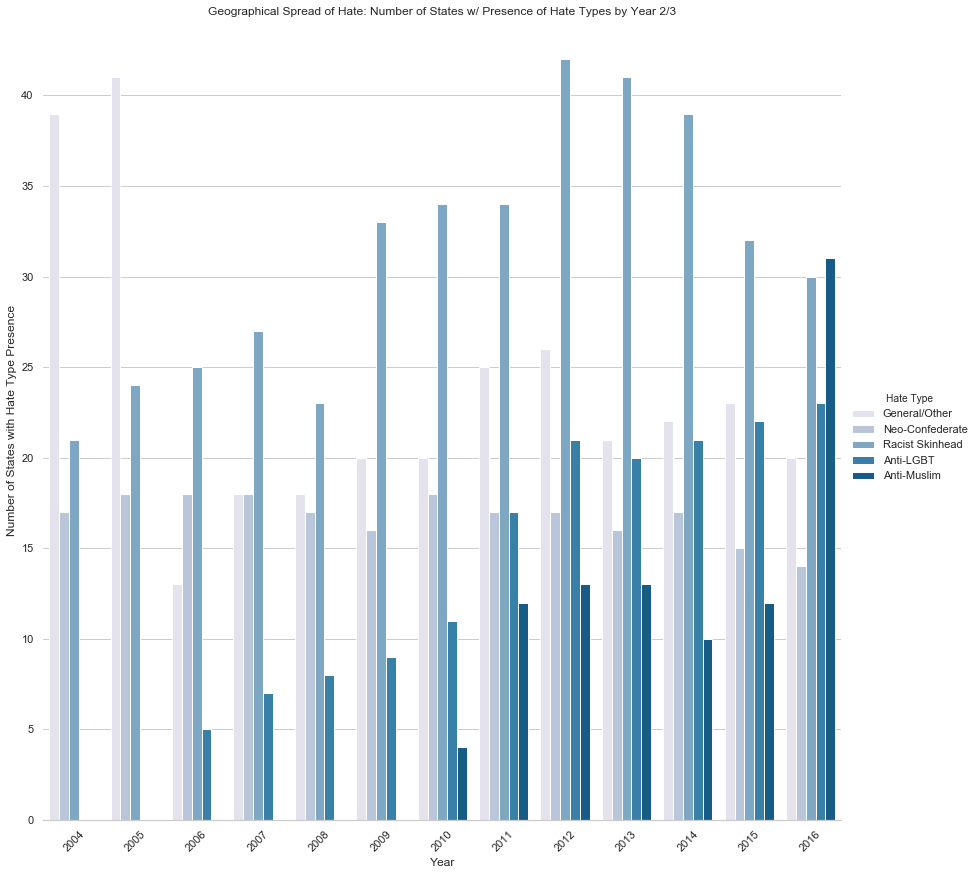

In [30]:
# chart 2

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(two)],
               height=12, kind="bar", palette="PuBu", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 2/3')
plt.show()

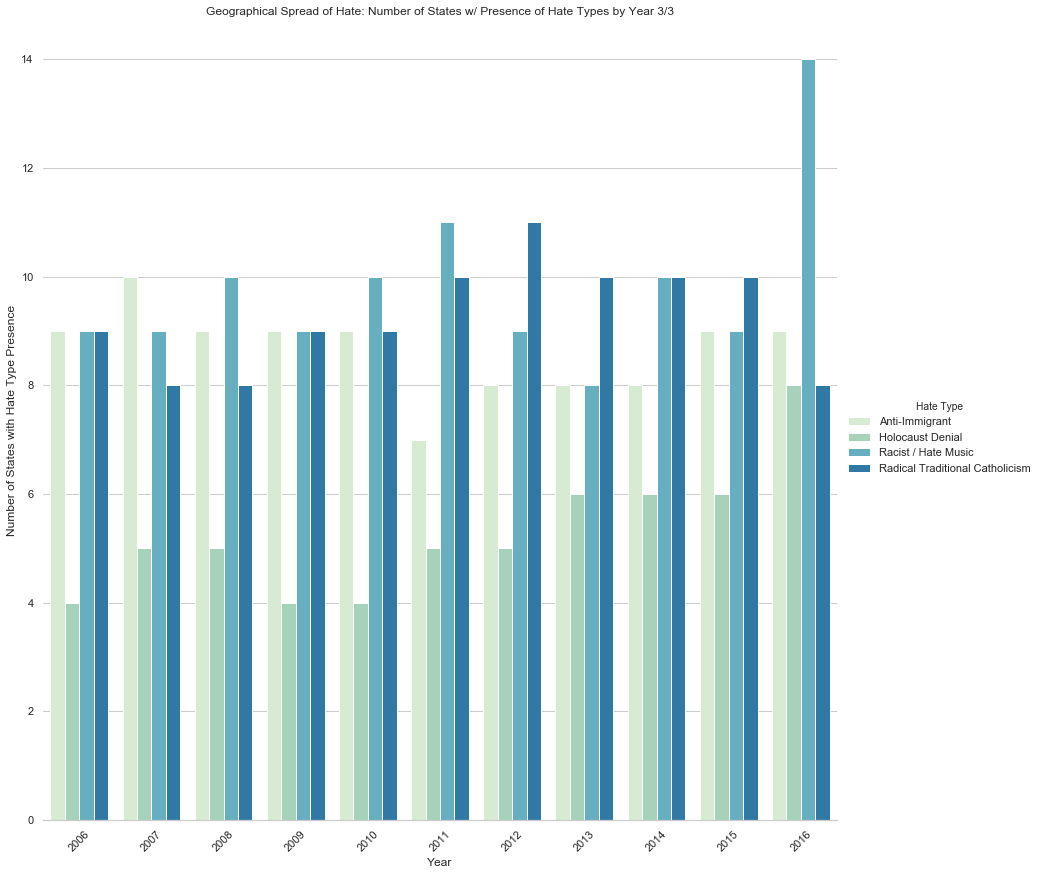

In [31]:
# chart 3

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(three)],
               height=12, kind="bar", palette="GnBu", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 3/3')
plt.show()

(talk about that a little bit)

Let's look closer at the hate groups, and see which ones are present in the largest number of cities and states.

In [32]:
hatemaps.groupby(['Year','Group Name'])['City'].count().sort_values(ascending=False).head(10)


Year  Group Name                 
2012  nation of islam                105
2007  league of the south            102
2006  league of the south            100
2005  league of the south             97
2004  league of the south             96
2008  league of the south             90
2011  nation of islam                 84
2016  nation of islam                 81
2006  national socialist movement     81
2015  nation of islam                 80
Name: City, dtype: int64

It looks like the Nation of Islam has had the largest geographical presence by city. Below, grouped by unique states, it shows a different picture. From this data, it appears that some of the groups that exist in more cities are more concentrated in certain states.

In [33]:
hatemaps.groupby(['Year',
                  'Group Name'])['State'].nunique().sort_values(ascending=False).head(10)

Year  Group Name                                     
2013  national socialist movement                        43
2012  national socialist movement                        41
2014  national socialist movement                        40
2011  national socialist movement                        39
2015  national socialist movement                        39
2010  brotherhood of klans knights of the ku klu klan    38
2013  loyal white knights of the ku klu klan             38
2006  national socialist movement                        35
2009  national socialist movement - nsm                  35
2012  nation of islam                                    34
Name: State, dtype: int64

histogram of number of hate crimes of each type per city per year

Number of hate crimes in each category compared with number of hate groups in that category
* by state
* by city

In [34]:
by_city_only.columns.values

array(['Unnamed: 0', 'Year', 'State_name', 'Agency name', 'REA',
       'Religion', 'Disability', 'Gender', 'Gender Identity',
       'Sexual orientation', 'State', 'Group Name', 'City', 'Hate Type'],
      dtype=object)

In [35]:
for col in ['REA', 'Religion','Disability', 'Gender', 'Gender Identity', 
            'Sexual orientation']:
    print(col, set([type(x) for x in by_city_only[col]]))
    by_city_only[col] = by_city_only[col].astype(int)
    
by_city_only['Gender'].unique()

REA {<class 'float'>}
Religion {<class 'float'>}
Disability {<class 'float'>}
Gender {<class 'float'>}
Gender Identity {<class 'float'>}
Sexual orientation {<class 'float'>}


array([0, 1, 4, 2, 3, 5])

## Hate Crimes in Each Category per City

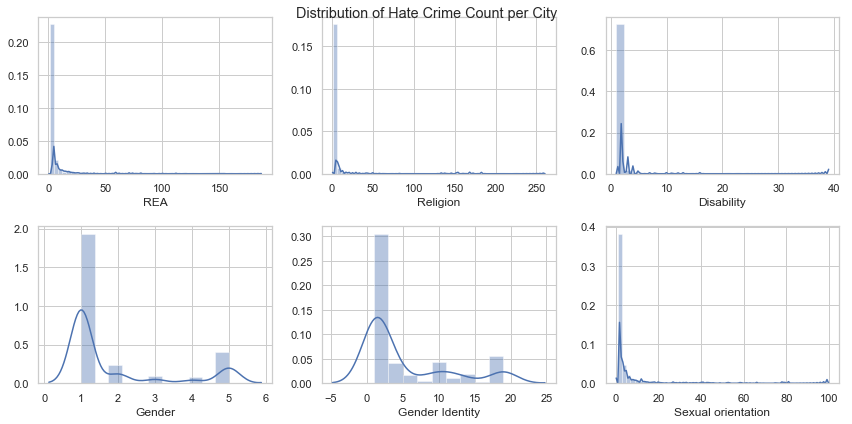

In [36]:
cols = ['REA', 'Religion', 'Disability', 'Gender',
       'Gender Identity', 'Sexual orientation']

sns.set(style="whitegrid")

f, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=False)
sns.despine(left=True)

for i in range(2*3):
    plt.subplot(2,3,i+1)
    sns.distplot(by_city_only[by_city_only[cols[i]] > 0][cols[i]].dropna().sort_values())
    plt.tight_layout()
    
plt.suptitle('Distribution of Hate Crime Count per City')
plt.show()

## Chronological Number of hate crimes per city by type

In [37]:
bias_crimes_bt = pd.read_csv('/Users/gemma/Documents/data science/fc-partial_bias_byst.csv')

bias_crimes_bt.drop('Unnamed: 0',1, inplace=True)

In [38]:
bias_crimes_bt.columns.values

array(['Year', 'State_name', 'Agency type', 'Agency name',
       'Race / Ethnicity / Ancestry', 'Religion', 'Disability', 'Gender',
       'Gender Identity', 'Sexual orientation', 'State'], dtype=object)

In [39]:
bias_crimes_bt.rename(index=str, 
                      columns={'Race / Ethnicity / Ancestry': 'REA'}, 
                      inplace=True)

In [40]:
bias_crimes_bt.head()

,Year,State_name,Agency type,Agency name,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,State
0,2006,Alabama,Total,Total,1.0,0.0,0.0,NaN,NaN,0.0,AL
1,2006,Alabama,Cities,Total,1.0,0.0,0.0,NaN,NaN,0.0,AL
2,2006,Alabama,Cities,Atmore,1.0,0.0,0.0,NaN,NaN,0.0,AL
3,2006,Alaska,Total,Total,4.0,0.0,0.0,NaN,NaN,2.0,AK
4,2006,Alaska,Cities,Total,4.0,0.0,0.0,NaN,NaN,2.0,AK


In [41]:
bias_crimes_bt['Bias Category'] = np.nan
bias_crimes_bt['Count'] = np.nan

In [42]:
bias_crimes_bt.loc['0', 'REA']

#bias_crimes_bt.shape

1.0

In [43]:
for col in ['REA', 'Religion','Disability', 'Gender', 'Gender Identity', 
            'Sexual orientation']:
    print(col, set([type(x) for x in bias_crimes_bt[col]]))

REA {<class 'float'>}
Religion {<class 'float'>}
Disability {<class 'float'>}
Gender {<class 'str'>, <class 'float'>}
Gender Identity {<class 'float'>}
Sexual orientation {<class 'float'>}


In [44]:
bias_crimes_bt[bias_crimes_bt['Gender'] == ' ']

,Year,State_name,Agency type,Agency name,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,State,Bias Category,Count
16923,2013,Nevada,Cities,Reno,2.0,1.0,0.0,,0.0,1.0,NV,NaN,NaN


In [45]:
bias_crimes_bt.iloc[16923, 7] = 0

In [ ]:
for i in range(len(bias_crimes_bt)):
    for x in cols:
        if bias_crimes_bt.loc[str(i), x] > 0:
            bias_crimes_bt.loc[str(i), 'Bias Category' ] = x
            bias_crimes_bt.loc[str(i), 'Count'] = by_city_only.loc[i, x]

In [ ]:
bias_crimes_bt.head()

In [ ]:
by_city_only[(by_city_only['REA'] > 0) & (by_city_only['Religion'] > 0)
            & (by_city_only['Disability'] > 0) & (by_city_only['Gender'] > 0)
            & (by_city_only['Gender Identity'] > 0) & (by_city_only['Sexual orientation'] > 0)]

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(by_city_only.loc[:,['Year','Agency name', 'Bias Category']].dropna(), col='Bias Category', col_wrap=3, #height=2,
                # ylim=(0,50), 
                xlim=(min(by_city_only['Year']),max(by_city_only['Year'])), 
                palette='husl', hue='Bias Category')

#g.map(plt.plot, mean_x, mean_y, marker='.')
#g.map(plt.axhline, y=np.median(state_type['State']))

g = g.map(plt.plot,'Year', 'Count', marker="o") 

g.set(xticks=np.arange(min(by_city_only['Year']), max(by_city_only['Year'])), 
      ylabel="Number of States", xlabel="Number of cities with crimes")

#for ax in g.axes:
#    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

g.fig.tight_layout(w_pad=1)

plt.show()

# dont forget

to look at the crime types (in crimes_by_state, belke basqa yerde de var)